In [ ]:
!pip install opencv-python

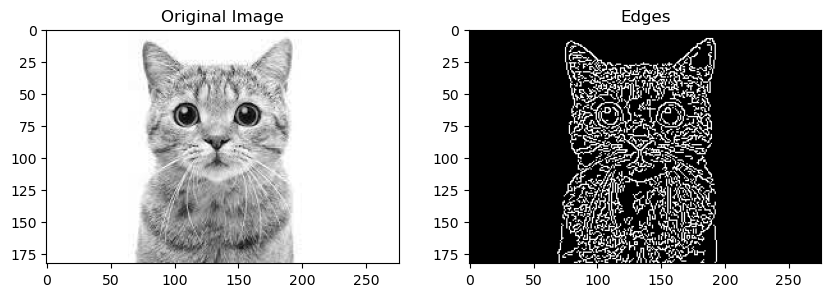

In [12]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"E:/11th Semester/Machine Learning/Final Term [Summer]/assignment/cat.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detector
edges = cv2.Canny(image, 100, 200)

# Display the original image and the edges
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Edges')
plt.imshow(edges, cmap='gray')
plt.show()

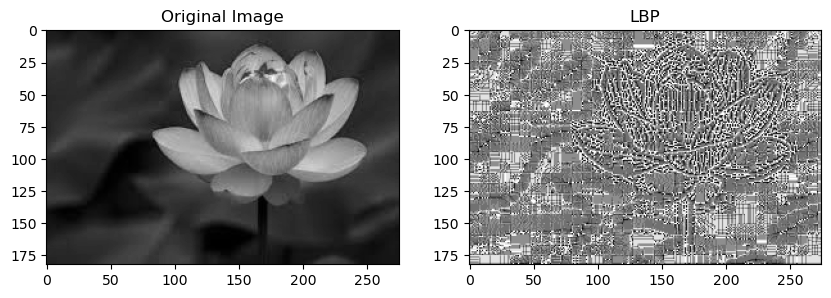

In [13]:
from skimage import io, feature
import matplotlib.pyplot as plt

# Load the image
image = io.imread('E:/11th Semester/Machine Learning/Final Term [Summer]/assignment/flower.jpg', as_gray=True)

# Apply Local Binary Pattern (LBP)
lbp = feature.local_binary_pattern(image, P=8, R=1, method='uniform')

# Display the original image and the LBP result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('LBP')
plt.imshow(lbp, cmap='gray')
plt.show()


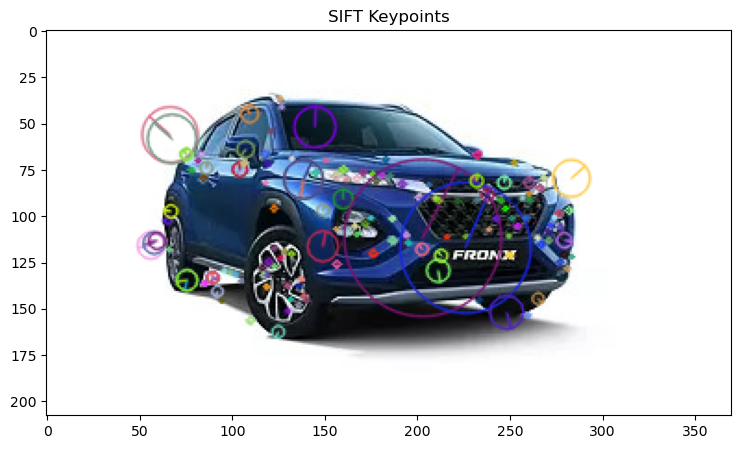

In [16]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('E:/11th Semester/Machine Learning/Final Term [Summer]/assignment/car.jpg') 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect SIFT keypoints
sift = cv2.SIFT_create()
keypoints = sift.detect(gray, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with keypoints
plt.figure(figsize=(10, 5))
plt.title('SIFT Keypoints')
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
E:/11th Semester\Machine Learning/Final Term [Summer]/CIFAR-10-images-master/train


100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:05<00:00, 917.70it/s]


50000


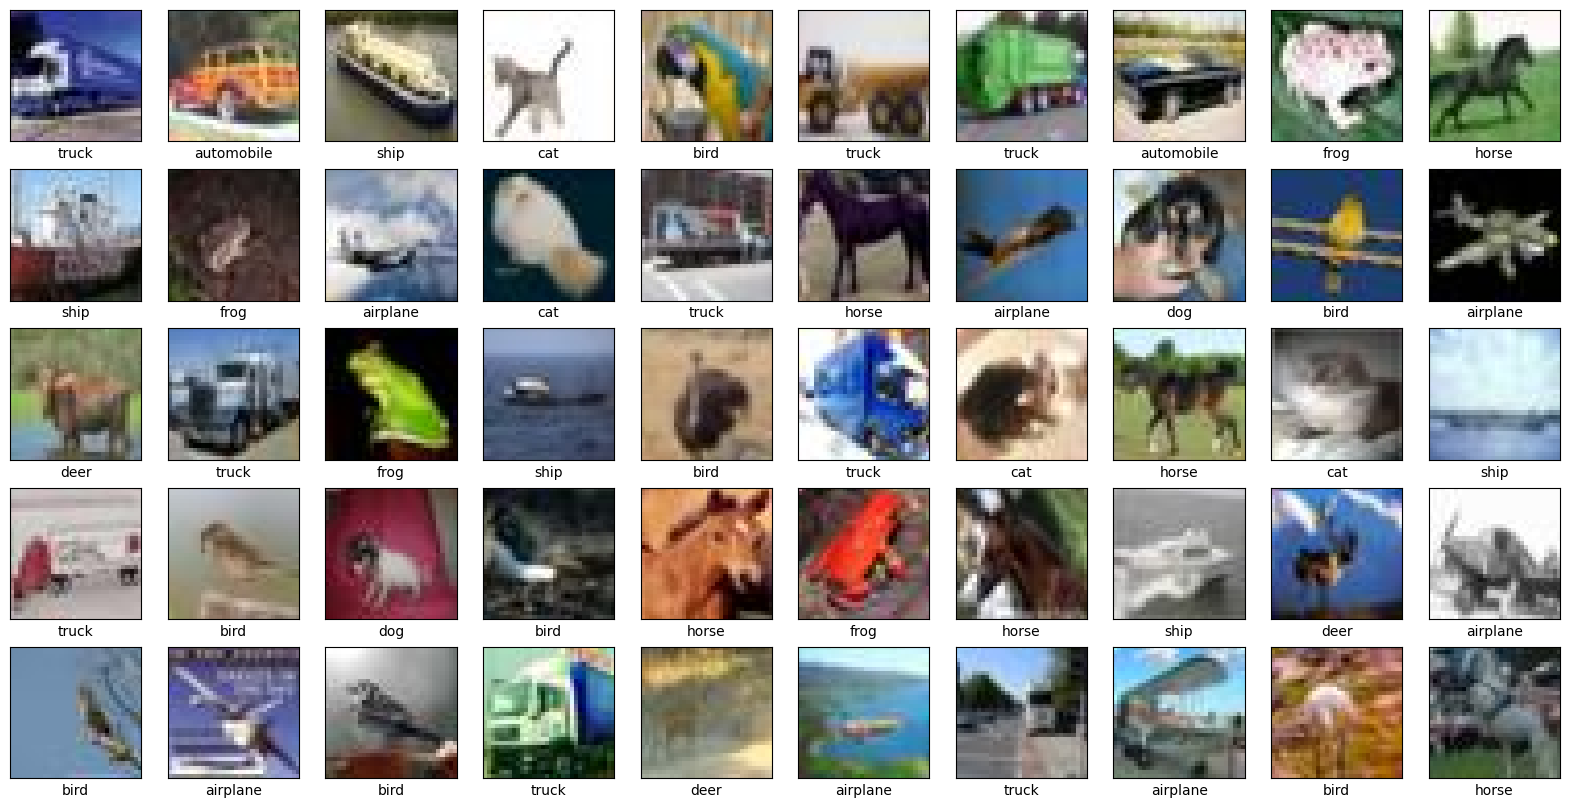

Color Histogram Features Shape: (512,)


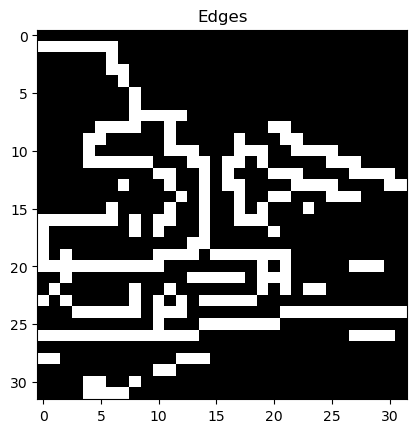

HOG Features Shape: (324,)


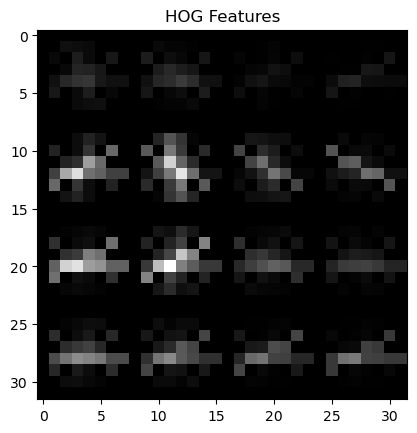

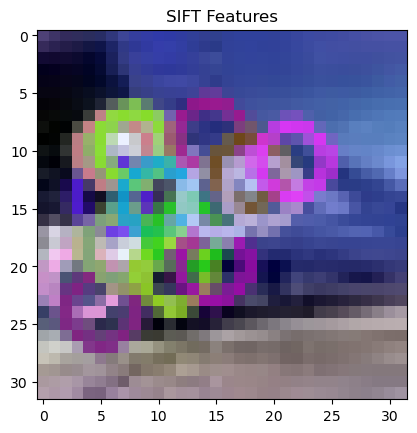

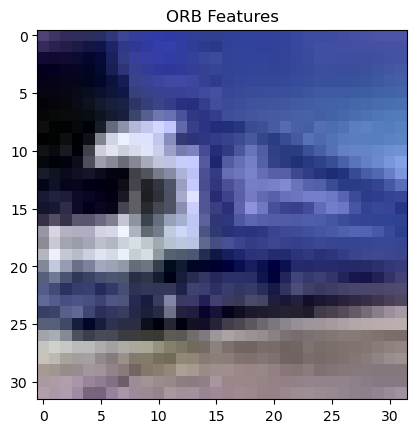

Color Histogram Features Shape: (512,)


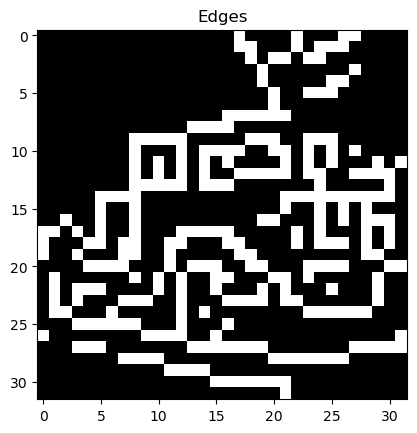

HOG Features Shape: (324,)


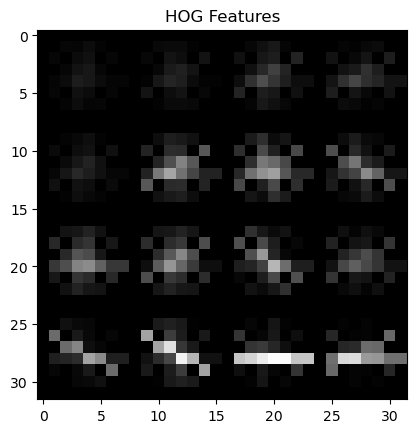

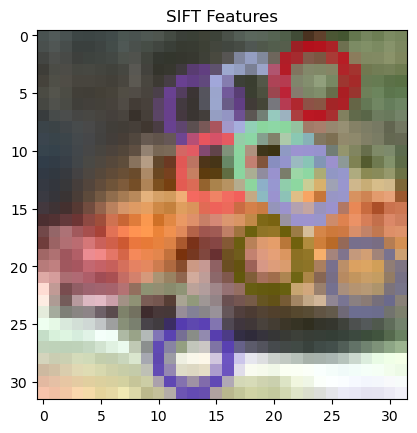

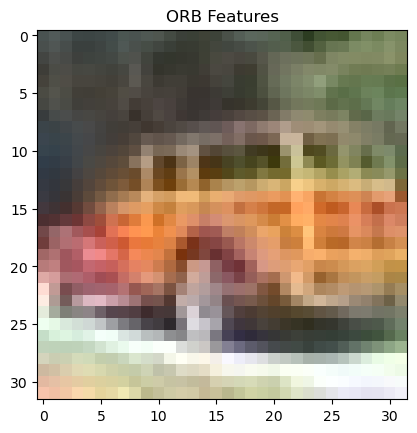

Color Histogram Features Shape: (512,)


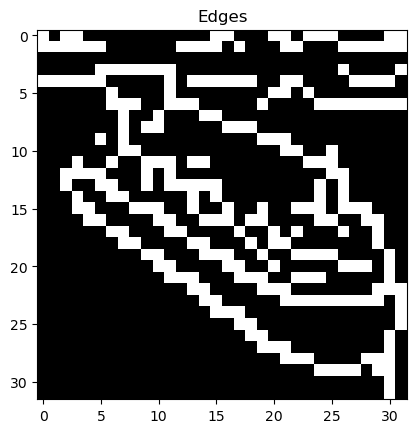

HOG Features Shape: (324,)


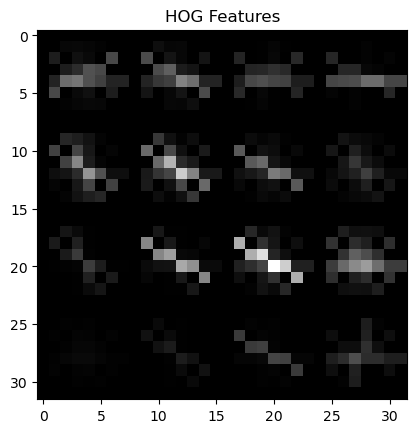

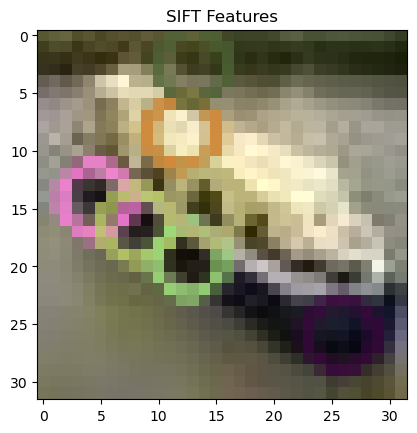

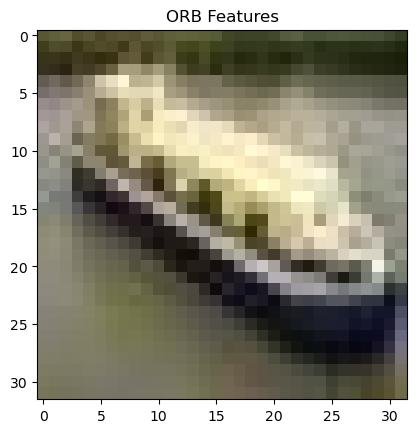

Color Histogram Features Shape: (512,)


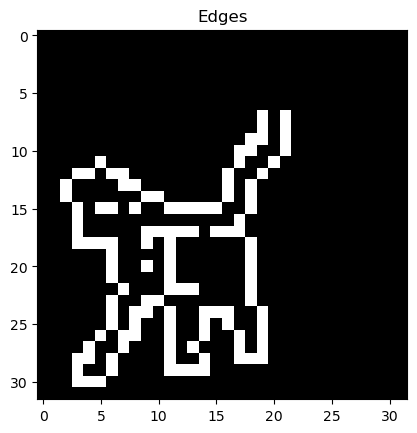

HOG Features Shape: (324,)


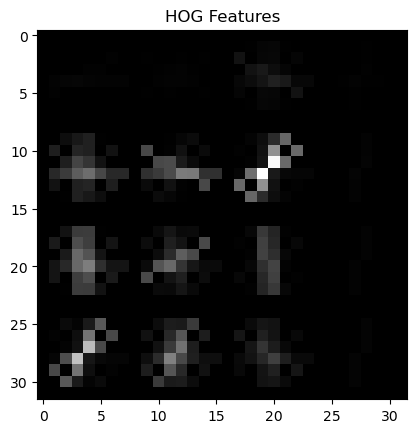

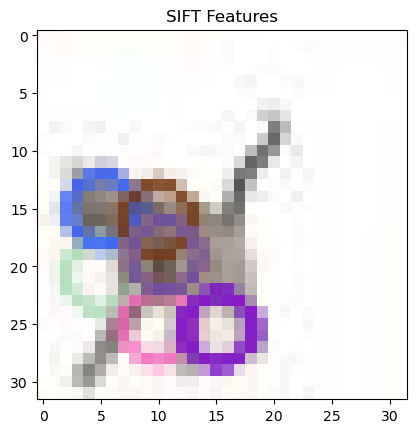

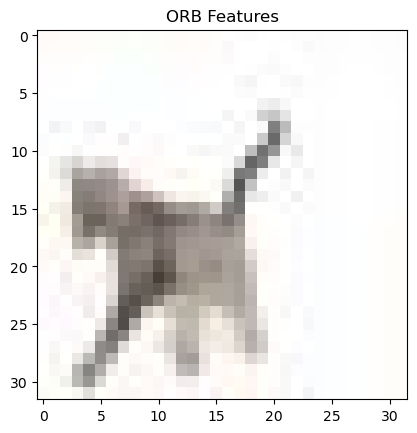

Color Histogram Features Shape: (512,)


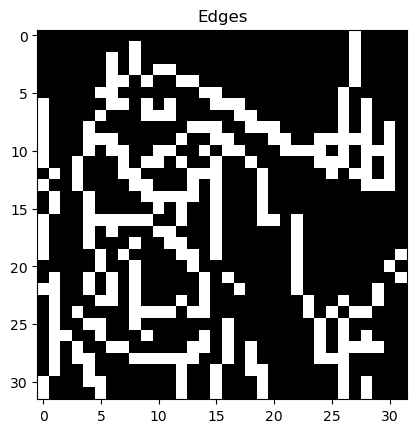

HOG Features Shape: (324,)


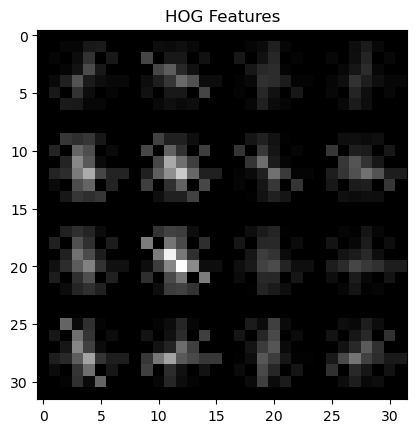

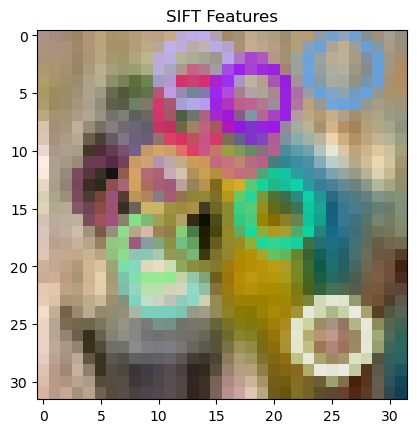

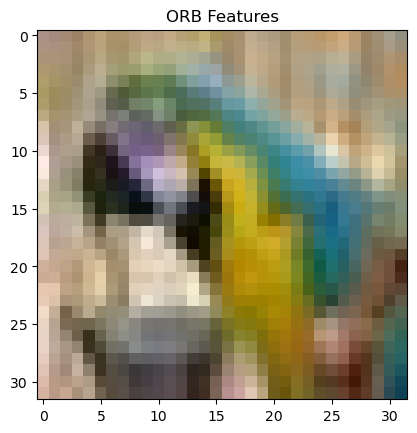

In [1]:
# CIFAR-10 DATASET

import os
import random
import numpy as np
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage.color import rgb2gray
 
# Reading data
TRAIN_DIR = 'E:/11th Semester\Machine Learning/Final Term [Summer]/CIFAR-10-images-master/train'
CATEGORIES = [c for c in os.listdir(TRAIN_DIR)]
print(CATEGORIES)
print(TRAIN_DIR)
 
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR, c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path, img))
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))
 
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20, 10))
 
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.imshow(cv2.cvtColor(TRAIN_DATA[i][0], cv2.COLOR_BGR2RGB))
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
plt.show()
 
# Feature extraction functions
def extract_color_histogram(image):
    histogram = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    return cv2.normalize(histogram, histogram).flatten()
 
def extract_edges(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    return edges
 
def extract_hog_features(image):
    gray = rgb2gray(image)
    hog_features, hog_image = hog(gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    return hog_features, hog_image
 
def extract_sift_features(image):
    sift = cv2.SIFT_create()
    gray = rgb2gray(image)
    keypoints, descriptors = sift.detectAndCompute((gray * 255).astype(np.uint8), None)
    return keypoints, descriptors
 
def extract_orb_features(image):
    orb = cv2.ORB_create()
    gray = rgb2gray(image)
    keypoints, descriptors = orb.detectAndCompute((gray * 255).astype(np.uint8), None)
    return keypoints, descriptors
 
# Example application of feature extraction
for i in range(5):
    img = TRAIN_DATA[i][0]
 
    # Color Histogram
    hist_features = extract_color_histogram(img)
    print(f"Color Histogram Features Shape: {hist_features.shape}")
 
    # Edges
    edges = extract_edges(img)
    plt.figure()
    plt.imshow(edges, cmap='gray')
    plt.title("Edges")
    plt.show()
 
    # HOG Features
    hog_features, hog_image = extract_hog_features(img)
    print(f"HOG Features Shape: {hog_features.shape}")
    plt.figure()
    plt.imshow(hog_image, cmap='gray')
    plt.title("HOG Features")
    plt.show()
 
    # SIFT Features
    keypoints_sift, descriptors_sift = extract_sift_features(img)
    img_sift = cv2.drawKeypoints(img, keypoints_sift, None)
    plt.figure()
    plt.imshow(cv2.cvtColor(img_sift, cv2.COLOR_BGR2RGB))
    plt.title("SIFT Features")
    plt.show()
 
    # ORB Features
    keypoints_orb, descriptors_orb = extract_orb_features(img)
    img_orb = cv2.drawKeypoints(img, keypoints_orb, None)
    plt.figure()
    plt.imshow(cv2.cvtColor(img_orb, cv2.COLOR_BGR2RGB))
    plt.title("ORB Features")
    plt.show()